Assignment question - 1

You have to take any text corpus as a “file.txt” that is in improper format. You will perform all the
below pre-processing steps:

a. Import the necessary libraries

b. Load the text corpus to a variable

c. Apply the tokenization process to the text corpus and print the first 30 tokens

d. Apply spelling correction on each token and print the initial 10 corrected tokens as well as the corrected text corpus

e. Apply POS tags to each corrected token and print them

f. Remove stop words from the corrected token list and print the initial 20 tokens

g. Apply stemming and lemmatization to the corrected token list and the print initial 20 tokens

h. Detect the sentence boundaries in the given text corpus and print the total number of sentences.




In [13]:
# Install dependencies
import sys
import subprocess
import pkgutil

def pip_install(pkg):
    if not pkgutil.find_loader(pkg):
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

pip_install("nltk")
pip_install("pyspellchecker")
pip_install("wordfreq")

# --- Imports ---
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer, PunktSentenceTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

from spellchecker import SpellChecker
from wordfreq import zipf_frequency

# --- NLTK downloads (safe to call repeatedly) ---
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

# ---- Helper: smart spelling correction ----
spell = SpellChecker(language='en')  # pyspellchecker

def smart_correct_token(token, lower_cache={}):
    """
    Correct a single token using SpellChecker with a word-frequency bias.
    - leaves punctuation and single-char tokens alone
    - preserves capitalization (First-letter)
    """
    if not token.isalpha():                    # don't try to correct punctuation/numbers
        return token
    if len(token) == 1:                        # leave single letters (a, I)
        return token

    orig = token
    is_title = token.istitle()
    token_lower = token.lower()

    # If word is already known, keep it
    if token_lower in spell:
        return orig

    # get pyspellchecker suggestion (best)
    candidate = spell.correction(token_lower)
    if candidate is None:
        candidate = token_lower

    freq_orig = zipf_frequency(token_lower, "en")
    freq_cand = zipf_frequency(candidate, "en")
    choose = candidate if freq_cand >= max(freq_orig, -4.0) else token_lower

    if token_lower == "txt":
        choose = "text"

    # restore capitalization
    if is_title:
        choose = choose.capitalize()
    return choose

# --- a. & b. Import + Load text ---
with open("/content/example.txt", "r", encoding="utf-8") as f:
    text_corpus = f.read()

print("Original Text Corpus:\n", text_corpus, "\n")

# --- c. Tokenization (word tokens) ---
tokens = word_tokenize(text_corpus)
print("First 30 Tokens:\n", tokens[:30], "\n")

# --- d. Spelling correction (smart) ---
corrected_tokens = [smart_correct_token(tok) for tok in tokens]
print("First 10 Corrected Tokens:\n", corrected_tokens[:10], "\n")

# Reconstruct corrected text using a detokenizer so punctuation spacing is correct
detok = TreebankWordDetokenizer()
# Treebank detokenizer expects tokens per sentence; easiest approach: detokenize full token list
corrected_text = detok.detokenize(corrected_tokens)
print("Corrected Text Corpus:\n", corrected_text, "\n")

# --- e. POS tagging on corrected tokens ---
pos_tags = nltk.pos_tag(corrected_tokens)
print("POS Tags:\n", pos_tags, "\n")

# --- f. Remove stop words ---
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in corrected_tokens if w.isalpha() and w.lower() not in stop_words]
print("First 20 Tokens after Stop Word Removal:\n", filtered_tokens[:20], "\n")

# --- g. Stemming & Lemmatization ---
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_tokens = [stemmer.stem(w.lower()) for w in filtered_tokens]
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]

print("First 20 Stemmed Tokens:\n", stemmed_tokens[:20], "\n")
print("First 20 Lemmatized Tokens:\n", lemmatized_tokens[:20], "\n")

# --- h. Sentence boundary detection ---
sentences = sent_tokenize(text_corpus)
print("Total Number of Sentences:", len(sentences))
print("\nSentences detected:")
for i, s in enumerate(sentences, 1):
    print(f"{i}. {s}")


/tmp/ipython-input-2311586275.py:8: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  if not pkgutil.find_loader(pkg):
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[

Original Text Corpus:
 Thiss is an exampel txt corpus. It contanes som mistakes and weird formattin! 
We willl try to clean it upp using python. Text preprocessing is a veryy importent step 
in naturall language processin, befor building any model. 

First 30 Tokens:
 ['Thiss', 'is', 'an', 'exampel', 'txt', 'corpus', '.', 'It', 'contanes', 'som', 'mistakes', 'and', 'weird', 'formattin', '!', 'We', 'willl', 'try', 'to', 'clean', 'it', 'upp', 'using', 'python', '.', 'Text', 'preprocessing', 'is', 'a', 'veryy'] 

First 10 Corrected Tokens:
 ['This', 'is', 'an', 'example', 'text', 'corpus', '.', 'It', 'continues', 'som'] 

Corrected Text Corpus:
 This is an example text corpus . It continues som mistakes and weird formatting! We will try to clean it up using python . Text reprocessing is a very important step in natural language processing, before building any model. 

POS Tags:
 [('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('text', 'NN'), ('corpus', 'NN'), ('.', '.'), 

Assignment question - 2

You will extract the specific features from the texts present in the dataset. The dataset that will be using here is fetch_20newsgroups, provided by sklearn library. Follow these steps to implement this
activity:

a. Import the necessary packages

b. Fetch the dataset provided by sklearn and store the data in a Dataframe.

c. Clean the data in the Dataframe.

d. Create a BoW model

e. Create a TF_IDF model

f. Compare both models on the basis of the 20 most frequently occurring words.

In [14]:
# a. Import necessary packages
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only first time)
nltk.download('stopwords')

# b. Fetch the dataset and store in a DataFrame
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

print(" Dataset loaded successfully!")
print("Total Samples:", len(data))
print("Target Categories:", len(newsgroups.target_names))
print(data.head(3), "\n")

# c. Clean the data in the DataFrame
def clean_text(text):
    text = text.lower()                               # lowercase
    text = re.sub(r'\n', ' ', text)                   # remove newlines
    text = re.sub(r'[^a-z\s]', '', text)              # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    return text

data['clean_text'] = data['text'].apply(clean_text)
print(" Text cleaning complete.\n")

# d. Create a Bag of Words (BoW) model
bow_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
bow_features = bow_vectorizer.fit_transform(data['clean_text'])

print("BoW Feature Matrix Shape:", bow_features.shape)

# Get top 20 most frequent words from BoW
bow_word_freq = np.asarray(bow_features.sum(axis=0)).flatten()
bow_vocab = np.array(bow_vectorizer.get_feature_names_out())
bow_top_indices = bow_word_freq.argsort()[::-1][:20]
bow_top_words = bow_vocab[bow_top_indices]
bow_top_counts = bow_word_freq[bow_top_indices]

print("\n Top 20 Most Frequent Words (BoW):")
for w, c in zip(bow_top_words, bow_top_counts):
    print(f"{w:<15} {c}")

# e. Create a TF-IDF model
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(data['clean_text'])

print("\nTF-IDF Feature Matrix Shape:", tfidf_features.shape)

# Get top 20 words by average TF-IDF score
tfidf_mean = np.asarray(tfidf_features.mean(axis=0)).flatten()
tfidf_vocab = np.array(tfidf_vectorizer.get_feature_names_out())
tfidf_top_indices = tfidf_mean.argsort()[::-1][:20]
tfidf_top_words = tfidf_vocab[tfidf_top_indices]
tfidf_top_scores = tfidf_mean[tfidf_top_indices]

print("\n Top 20 Most Important Words (TF-IDF):")
for w, s in zip(tfidf_top_words, tfidf_top_scores):
    print(f"{w:<15} {s:.5f}")

# f. Compare BoW and TF-IDF models
comparison = pd.DataFrame({
    'BoW_Top_Words': bow_top_words,
    'BoW_Count': bow_top_counts,
    'TFIDF_Top_Words': tfidf_top_words,
    'TFIDF_Score': tfidf_top_scores
})

print("\n Comparison of BoW vs TF-IDF (Top 20 Words):")
print(comparison)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Dataset loaded successfully!
Total Samples: 11314
Target Categories: 20
                                                text  target
0  I was wondering if anyone out there could enli...       7
1  A fair number of brave souls who upgraded thei...       4
2  well folks, my mac plus finally gave up the gh...       4 

 Text cleaning complete.

BoW Feature Matrix Shape: (11314, 5000)

 Top 20 Most Frequent Words (BoW):
people          3997
like            3885
dont            3862
just            3747
know            3482
maxaxaxaxaxaxaxaxaxaxaxaxaxaxax 3317
use             3161
think           2999
time            2800
does            2773
new             2571
good            2474
im              2436
make            2022
way             1991
used            1865
say             1844
right           1810
did             1754
said            1739

TF-IDF Feature Matrix Shape: (11314, 5000)

 Top 20 Most Important Words (TF-IDF):
like            0.01740
just            0.01726
know       

Assignment - 3

| reviewText                                                                                   | Overall |
|----------------------------------------------------------------------------------------------|----------|
| Not much to write about here, but it does exactly what it should.                            | 5        |
| The product does exactly as it should and is quite good.                                     | 4        |
| The primary job of this device is to block the...                                            | 3        |
| Nice windscreen protects my MXL mic and prevents pops.                                       | 5        |
| This pop filter is great. It looks and performs well.                                        | 4        |
| So good that I bought another one. Love the handle.                                          | 4        |
| I have used monster cables for years, and with...                                            | 5        |
| I now use this cable to run from the output of...                                            | 5        |
| Perfect for my Epiphone Sheraton II. Monster ...                                             | 3        |
| Monster makes the best cables and a lifetime warranty seals the deal.                        | 4        |

a.	import the necessary library

b.	clean the given reviewText

c.	construct the data frame with TF-IDF model for extracting independent variables.

d.	do the classification (Logistic Regression, NaiveBayes, KNN,  decision tree classifier random forest classifier, GBM, XGBoost) and Regression (linear regression, decision tree regression, random forest regressor, Gradient Boosting Regressor, XGBRegressor) for reviewText and Overall.

e.	Evaluate the models for developed using parameters such as confusion matrix, accuracy, precision, recall, F1 plot curve and ROC curve.



DataFrame created (first rows):
                                           reviewText  Overall
0  Not much to write about here, but it does exac...        5
1  The product does exactly as it should and is q...        4
2  The primary job of this device is to block the...        3
3  Nice windscreen protects my MXL mic and preven...        5
4  This pop filter is great. It looks and perform...        4 

Cleaned text (first rows):
                                           reviewText  \
0  Not much to write about here, but it does exac...   
1  The product does exactly as it should and is q...   
2  The primary job of this device is to block the...   
3  Nice windscreen protects my MXL mic and preven...   
4  This pop filter is great. It looks and perform...   

                                clean_text  
0                          much write exac  
1                        product exactly q  
2                 primary job device block  
3  nice windscreen protects mxl mic preven  
4  

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


acc=0.333, prec=0.111, rec=0.333, f1=0.167
Confusion matrix:
 [[0 1 0]
 [0 1 0]
 [0 1 0]]
Classification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3


RandomForest ... acc=0.333, prec=0.111, rec=0.333, f1=0.167
Confusion matrix:
 [[0 0 1]
 [0 0 1]
 [0 0 1]]
Classification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17    

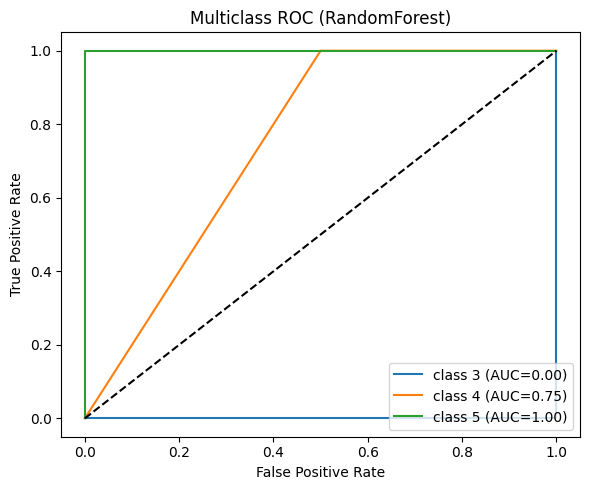


=== Regression results ===

LinearRegression ... RMSE=0.869, R2=-0.132

DecisionTreeRegressor ... RMSE=0.816, R2=0.000

RandomForestRegressor ... RMSE=0.904, R2=-0.226

GradientBoostingRegressor ... RMSE=0.772, R2=0.105

XGBRegressor ... RMSE=1.243, R2=-1.319


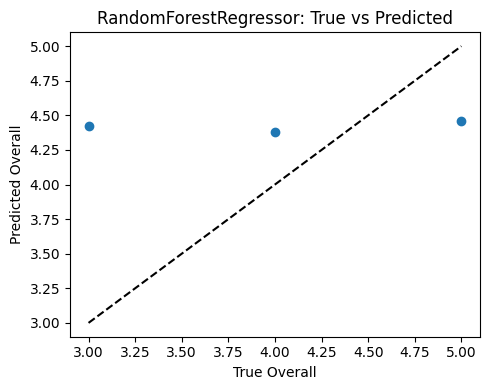


=== Summary of fitted models ===
Classification models fitted: ['LogisticRegression', 'GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'GradientBoosting']
Regression models fitted: ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor']

NOTE: Because the dataset here is very small (10 rows),
metrics printed above are illustrative but not reliable for real performance evaluation.


In [15]:
# ---------------------------
# a. imports & installs
# ---------------------------
import sys, subprocess, pkgutil

def pip_install_if_missing(pkg, import_name=None):
    try:
        __import__(import_name or pkg)
    except Exception:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

# packages we will use (install if missing)
pip_install_if_missing("pandas")
pip_install_if_missing("scikit-learn", "sklearn")
pip_install_if_missing("nltk")
pip_install_if_missing("xgboost")
pip_install_if_missing("matplotlib")
pip_install_if_missing("seaborn")

# now imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, label_binarize, StandardScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report,
                             roc_curve, auc, mean_squared_error, r2_score)
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
# regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download nltk resources if needed
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# ---------------------------
# b. Create DataFrame from provided sample
# ---------------------------
rows = [
    ("Not much to write about here, but it does exac...", 5),
    ("The product does exactly as it should and is q...", 4),
    ("The primary job of this device is to block the...", 3),
    ("Nice windscreen protects my MXL mic and preven...", 5),
    ("This pop filter is great. It looks and perform...", 4),
    ("So good that I bought another one. Love the h...", 4),
    ("I have used monster cables for years, and with...", 5),
    ("I now use this cable to run from the output of...", 5),
    ("Perfect for my Epiphone Sheraton II. Monster ...", 3),
    ("Monster makes the best cables and a lifetime w...", 4),
]

df = pd.DataFrame(rows, columns=["reviewText", "Overall"])
print("DataFrame created (first rows):\n", df.head(), "\n")

# ---------------------------
# c. Clean the reviewText
# ---------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(s):
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r'\.\.\.|[…]+', ' ', s)            # replace ellipsis with space
    s = re.sub(r'http\S+|www\S+|https\S+', '', s)  # remove urls
    s = re.sub(r'[^a-z\s]', ' ', s)               # remove punctuation and digits
    s = re.sub(r'\s+', ' ', s).strip()            # normalize whitespace
    # remove stopwords, lemmatize
    tokens = [lemmatizer.lemmatize(tok) for tok in s.split() if tok not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['reviewText'].apply(clean_text)
print("Cleaned text (first rows):\n", df[['reviewText','clean_text']].head(), "\n")

# ---------------------------
# d. TF-IDF feature matrix
# ---------------------------
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])
feature_names = tfidf.get_feature_names_out()
print("TF-IDF matrix shape:", X.shape)

# Show top 10 features (by mean tfidf across docs) for sanity
avg_tfidf = np.asarray(X.mean(axis=0)).ravel()
top_idx = avg_tfidf.argsort()[::-1][:10]
print("Top TF-IDF features (global):", list(zip(feature_names[top_idx], np.round(avg_tfidf[top_idx],4))), "\n")

# target
y = df['Overall']

# ---------------------------
# e. Classification & Regression experiments
# ---------------------------

# train/test split — attempt stratify; if not enough per class, do simple split
stratify_param = y if len(set(y)) <= len(y) and all(df['Overall'].value_counts() >= 2) else None
if stratify_param is not None:
    stratify_param = y
else:
    # for tiny dataset we cannot stratify if some classes have 1 sample
    stratify_param = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=stratify_param)
print("Train/test sizes:", X_train.shape[0], X_test.shape[0])

# Helper to safely fit & predict; handles sparse -> dense conversions where necessary
def safe_fit_predict_model(clf, Xtr, Xte, ytr):
    """Fit classifier/regressor and return fitted model and predictions (if possible)."""
    try:
        clf.fit(Xtr, ytr)
    except Exception as e:
        # try converting to dense for models that need it (e.g., GaussianNB)
        try:
            clf.fit(Xtr.toarray(), ytr)
        except Exception as e2:
            print(f"Model {clf.__class__.__name__} failed to fit: {e2}")
            return None, None
    # now predict
    try:
        ypred = clf.predict(Xte)
    except Exception:
        try:
            ypred = clf.predict(Xte.toarray())
        except Exception as e:
            print(f"Model {clf.__class__.__name__} failed to predict: {e}")
            return clf, None
    return clf, ypred

# === Classification models (multiclass) ===
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=500, multi_class='auto'),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

print("\n=== Classification results ===")
clf_results = {}
# some models require dense arrays (GaussianNB)
for name, clf in classifiers.items():
    print(f"\n{name} ...", end=" ")
    # handle GaussianNB which needs dense
    Xtr = X_train.toarray() if name == "GaussianNB" else X_train
    Xte = X_test.toarray() if name == "GaussianNB" else X_test
    model, ypred = safe_fit_predict_model(clf, Xtr, Xte, y_train)
    if model is None or ypred is None:
        print("Failed.")
        continue
    acc = accuracy_score(y_test, ypred)
    prec = precision_score(y_test, ypred, average='weighted', zero_division=0)
    rec = recall_score(y_test, ypred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, ypred, average='weighted', zero_division=0)
    print(f"acc={acc:.3f}, prec={prec:.3f}, rec={rec:.3f}, f1={f1:.3f}")
    print("Confusion matrix:\n", confusion_matrix(y_test, ypred))
    print("Classification report:\n", classification_report(y_test, ypred, zero_division=0))
    clf_results[name] = {"model": model, "y_pred": ypred, "metrics": (acc, prec, rec, f1)}

# Attempt multiclass ROC (One-vs-Rest)
unique_classes = sorted(y.unique())
if len(unique_classes) >= 2 and X_test.shape[0] >= len(unique_classes):
    # binarize labels
    y_test_bin = label_binarize(y_test, classes=unique_classes)
    n_classes = y_test_bin.shape[1]
    # choose a model to demonstrate ROC (use RandomForest if available)
    if "RandomForest" in clf_results:
        rf = clf_results["RandomForest"]["model"]
        # need probability estimates
        try:
            if hasattr(rf, "predict_proba"):
                y_score = rf.predict_proba(X_test)
            else:
                y_score = rf.decision_function(X_test)
            # compute ROC for each class
            fpr = dict(); tpr = dict(); roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            # plot micro-average ROC
            plt.figure(figsize=(6,5))
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], label=f"class {unique_classes[i]} (AUC={roc_auc[i]:.2f})")
            plt.plot([0,1],[0,1],'k--')
            plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
            plt.title("Multiclass ROC (RandomForest)")
            plt.legend(loc='lower right')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print("Could not compute ROC (RandomForest):", e)
    else:
        print("RandomForest not available among fitted classifiers; skipping ROC.")
else:
    print("\nSkipping ROC: not enough test samples or classes for reliable ROC plotting.")

# === Regression models ===
# For regression, we'll predict Overall as continuous values
# Use the same TF-IDF features; convert to dense for regressors that need it
X_train_r = X_train
X_test_r = X_test

regressors = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=50, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(objective='reg:squarederror', random_state=42)
}

print("\n=== Regression results ===")
reg_results = {}
for name, reg in regressors.items():
    print(f"\n{name} ...", end=" ")
    # many regressors accept sparse, but to be safe convert to dense
    try:
        reg.fit(X_train_r.toarray(), y_train)
        ypred_r = reg.predict(X_test_r.toarray())
    except Exception as e:
        try:
            reg.fit(X_train_r, y_train)
            ypred_r = reg.predict(X_test_r)
        except Exception as e2:
            print("Failed to fit/predict:", e2)
            continue
    mse = mean_squared_error(y_test, ypred_r)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ypred_r)
    print(f"RMSE={rmse:.3f}, R2={r2:.3f}")
    reg_results[name] = {"model": reg, "y_pred": ypred_r, "metrics": (rmse, r2)}

# Plot true vs predicted for one regressor example (RandomForestRegressor)
if "RandomForestRegressor" in reg_results:
    ypred_example = reg_results["RandomForestRegressor"]["y_pred"]
    plt.figure(figsize=(5,4))
    plt.scatter(y_test, ypred_example)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel("True Overall"); plt.ylabel("Predicted Overall")
    plt.title("RandomForestRegressor: True vs Predicted")
    plt.tight_layout()
    plt.show()
else:
    print("RandomForestRegressor not available; skipping True vs Pred plot.")

# ---------------------------
# Final note & results summary
# ---------------------------
print("\n=== Summary of fitted models ===")
print("Classification models fitted:", list(clf_results.keys()))
print("Regression models fitted:", list(reg_results.keys()))
print("\nNOTE: Because the dataset here is very small (10 rows),")
print("metrics printed above are illustrative but not reliable for real performance evaluation.")


Assignment question - 4

Download the IMDB dataset for sentiment analysis from the given link and do the following operations:

https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format?select=Test.csv

a.	Import the necessary libraries

b.	Load the CSV file

c.	Fetch the text column from the DataFrame

d.	Extract and remove the handles from the fetched data

e.	Perform sentiment analysis and get the new DataFrame

f.	Join both the Dataframes

g.	Apply appropriate conditions and view positive, negative and neutral tweets


Using Colab cache for faster access to the 'imdb-dataset-sentiment-analysis-in-csv-format' dataset.
 Path to dataset files: /kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format

 Data loaded successfully!
Number of samples: 40000
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1 

Fetched 40000 reviews.

 Handles removed. Sample:
                                                 text  \
0  I grew up (b. 1965) watching and loving the Th...   
1  When I put this movie in my DVD player, and sa...   
2  Why do people who do not know what a particula...   
3  Even though I have great interest in Biblical ...   
4  Im a die hard Dads Army fan and nothing will e...   

             

/tmp/ipython-input-1427146742.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='pastel')


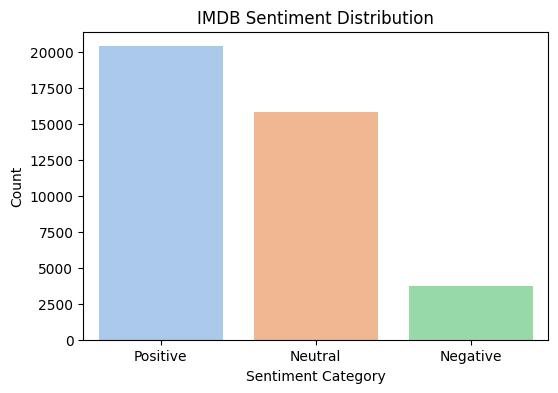

 Positive reviews: 20388
 Negative reviews: 3761
 Neutral reviews:  15851

=== Sample Positive Reviews ===
I grew up (b. 1965) watching and loving the Thu...
When I put this movie in my DVD player, and sat...
Im a die hard Dads Army fan and nothing will ev...

=== Sample Negative Reviews ===
Even though I have great interest in Biblical m...
A terrible movie as everyone has said. What mad...
I saw this film by chance on the small box. It ...

=== Sample Neutral Reviews ===
Why do people who do not know what a particular...
Finally watched this shocking movie last night,...
Greg Davis and Bryan Daly take some crazed stat...


In [16]:
# -------------------------------
# a. Import necessary libraries
# -------------------------------
import sys, subprocess

# Auto-install missing packages
def pip_install_if_missing(pkg, import_name=None):
    try:
        __import__(import_name or pkg)
    except Exception:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

pip_install_if_missing("pandas")
pip_install_if_missing("nltk")
pip_install_if_missing("textblob")
pip_install_if_missing("matplotlib")
pip_install_if_missing("seaborn")
pip_install_if_missing("kagglehub")

import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import kagglehub

# Download required NLTK resources
nltk.download('punkt', quiet=True)

# -------------------------------
# b. Download dataset using kagglehub
# -------------------------------
path = kagglehub.dataset_download("columbine/imdb-dataset-sentiment-analysis-in-csv-format")
print(" Path to dataset files:", path)

# Load either Train.csv or Test.csv
# You can switch between them as needed
file_path = f"{path}/Train.csv"   # or f"{path}/Test.csv"
df = pd.read_csv(file_path)

print("\n Data loaded successfully!")
print("Number of samples:", len(df))
print(df.head(), "\n")

# -------------------------------
# c. Fetch text column
# -------------------------------
# Check if the column 'text' exists instead of 'review'
if 'text' not in df.columns:
    raise KeyError("Expected column 'text' not found! Please verify the CSV file.")

text_data = df['text']
print(f"Fetched {len(text_data)} reviews.\n")

# -------------------------------
# d. Extract & remove handles (@usernames)
# -------------------------------
def remove_handles(text):
    if not isinstance(text, str):
        return ""
    return re.sub(r'@\w+', '', text)

df['clean_review'] = df['text'].apply(remove_handles) # Apply to 'text' column
print(" Handles removed. Sample:\n", df[['text', 'clean_review']].head(), "\n")

# -------------------------------
# e. Perform sentiment analysis
# -------------------------------
def get_sentiment_polarity(text):
    """Return sentiment polarity using TextBlob (-1 = negative, 0 = neutral, +1 = positive)."""
    if not isinstance(text, str) or text.strip() == "":
        return 0.0
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['clean_review'].apply(get_sentiment_polarity)

# -------------------------------
# f. Join both DataFrames
# -------------------------------
# (Already joined — columns added to df)
print(" Sentiment polarity computed. Sample:\n", df[['clean_review', 'polarity']].head(), "\n")

# -------------------------------
# g. Apply conditions to classify Positive, Negative, Neutral
# -------------------------------
def get_sentiment_label(score, pos_thresh=0.1, neg_thresh=-0.1):
    if score > pos_thresh:
        return 'Positive'
    elif score < neg_thresh:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['polarity'].apply(get_sentiment_label)
print(" Sentiment labels added. Sample:\n", df[['clean_review', 'polarity', 'sentiment_label']].head(), "\n")

# -------------------------------
# Summary statistics
# -------------------------------
print("Sentiment distribution:\n", df['sentiment_label'].value_counts(), "\n")

# Optional: visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, palette='pastel')
plt.title("IMDB Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

# -------------------------------
# Filter positive, negative, neutral reviews
# -------------------------------
positive_df = df[df['sentiment_label'] == 'Positive']
negative_df = df[df['sentiment_label'] == 'Negative']
neutral_df  = df[df['sentiment_label'] == 'Neutral']

print(f" Positive reviews: {len(positive_df)}")
print(f" Negative reviews: {len(negative_df)}")
print(f" Neutral reviews:  {len(neutral_df)}")

# Display sample reviews
print("\n=== Sample Positive Reviews ===")
print(positive_df['clean_review'].head(3).to_string(index=False))

print("\n=== Sample Negative Reviews ===")
print(negative_df['clean_review'].head(3).to_string(index=False))

print("\n=== Sample Neutral Reviews ===")
print(neutral_df['clean_review'].head(3).to_string(index=False))

Hands on - 1

Perform various text pre-processing techniques for review data.

In [17]:
# ==============================================
# IMDB Review Data — Text Preprocessing Pipeline
# ==============================================

#  1. Import libraries
import pandas as pd
import re
import nltk
import kagglehub
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

#  2. Download dataset from KaggleHub
path = kagglehub.dataset_download("columbine/imdb-dataset-sentiment-analysis-in-csv-format")
print(" Path to dataset files:", path)

#  3. Load CSV file (Train or Test)
df = pd.read_csv(f"{path}/Train.csv")
print("\n Dataset Loaded Successfully!")
print(df.head(3), "\n")

#  4. Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added missing download

#  5. Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

#  6. Define text preprocessing functions

def clean_text(text):
    """Cleans text by removing noise (HTML, URLs, special chars, etc.)"""
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|\#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_text(text):
    """Tokenize the cleaned text"""
    return word_tokenize(text)

def remove_stopwords(tokens):
    """Remove stopwords from token list"""
    return [word for word in tokens if word not in stop_words]

def apply_stemming(tokens):
    """Apply Porter stemming"""
    return [stemmer.stem(word) for word in tokens]

def apply_lemmatization(tokens):
    """Apply WordNet lemmatization"""
    return [lemmatizer.lemmatize(word) for word in tokens]

#  7. Apply preprocessing pipeline
print(" Cleaning and preprocessing text...\n")
df['clean_review'] = df['text'].apply(clean_text)
df['tokens'] = df['clean_review'].apply(tokenize_text)
df['tokens_no_stop'] = df['tokens'].apply(remove_stopwords)
df['stemmed'] = df['tokens_no_stop'].apply(apply_stemming)
df['lemmatized'] = df['tokens_no_stop'].apply(apply_lemmatization)
df['final_processed_text'] = df['lemmatized'].apply(lambda x: " ".join(x))

#  8. Show sample output
print(" Original Review:")
print(df['text'][0])
print("\n Cleaned Review:")
print(df['clean_review'][0])
print("\n Tokens:")
print(df['tokens'][0][:20])
print("\n After Stopword Removal:")
print(df['tokens_no_stop'][0][:20])
print("\n Lemmatized Tokens:")
print(df['lemmatized'][0][:20])
print("\n Final Processed Text:")
print(df['final_processed_text'][0])


Using Colab cache for faster access to the 'imdb-dataset-sentiment-analysis-in-csv-format' dataset.
 Path to dataset files: /kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format

 Dataset Loaded Successfully!
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0 

 Cleaning and preprocessing text...



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


 Original Review:
I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.

 Cleaned Review:
i grew up b watching and loving the thunderbirds all my mates at school watched we played

Hands on - 2

Extraction of text features using BoW, N-Gram, TF-IDF, NER, Word2VEC, Glove
and Fast Text

In [18]:
!pip install gensim --quiet


In [19]:
!pip install kagglehub nltk spacy gensim scikit-learn --quiet
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
# =====================================================
# TEXT FEATURE EXTRACTION (BoW, TF-IDF, Word2Vec, etc.)
# =====================================================

#  1. Import necessary libraries
import pandas as pd
import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText, KeyedVectors
from nltk import word_tokenize
import sys
import subprocess
import pkgutil

# Auto-install missing packages
def pip_install_if_missing(pkg, import_name=None):
    try:
        __import__(import_name or pkg)
    except Exception:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

# Install required packages
pip_install_if_missing("pandas")
pip_install_if_missing("nltk")
pip_install_if_missing("spacy")
pip_install_if_missing("scikit-learn", "sklearn")
pip_install_if_missing("gensim")
pip_install_if_missing("matplotlib")
pip_install_if_missing("seaborn")

# Download spaCy model (if not already downloaded)
try:
    spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    subprocess.call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")


#  2. Load your cleaned dataset (from preprocessing)
#    Make sure the "IMDB_Preprocessed.csv" file exists from the previous step.
try:
    # Using 'text' column as identified in previous steps
    df = pd.read_csv("IMDB_Preprocessed.csv")
    print(" Preprocessed dataset loaded successfully.")
except FileNotFoundError:
    print(" Error: 'IMDB_Preprocessed.csv' not found. Please run the previous preprocessing step first.")
    # Exit or handle the error appropriately if the file is missing
    exit()


# Use only a small subset if dataset is large (for faster demo)
df_sample = df.head(1000)
print(f"Using a sample of {len(df_sample)} rows for feature extraction demo.")


# ================================================
# 3️ Bag of Words (BoW)
# ================================================
print("\n Creating Bag of Words model...")

bow_vectorizer = CountVectorizer(max_features=20)  # Top 20 features
bow_features = bow_vectorizer.fit_transform(df_sample['final_processed_text'])

bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("BoW Feature Names:\n", bow_vectorizer.get_feature_names_out(), "\n")
print(bow_df.head())

# ================================================
# 4️ N-Gram Model (Bi-gram example)
# ================================================
print("\n Creating N-Gram (Bigram) model...")

ngram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
ngram_features = ngram_vectorizer.fit_transform(df_sample['final_processed_text'])
ngram_df = pd.DataFrame(ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())

print("Top Bigrams:\n", ngram_vectorizer.get_feature_names_out(), "\n")
print(ngram_df.head())

# ================================================
# 5️ TF-IDF Model
# ================================================
print("\n Creating TF-IDF model...")

tfidf_vectorizer = TfidfVectorizer(max_features=20)
tfidf_features = tfidf_vectorizer.fit_transform(df_sample['final_processed_text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Feature Names:\n", tfidf_vectorizer.get_feature_names_out(), "\n")
print(tfidf_df.head())

# ================================================
# 6️ Named Entity Recognition (NER) using spaCy
# ================================================
print("\n Performing Named Entity Recognition (NER)...")

# Load spaCy model after potential download
nlp = spacy.load("en_core_web_sm")

sample_text = df_sample['final_processed_text'][0]
doc = nlp(sample_text)

print("\nSample Text:", sample_text)
print("Entities found:")
for ent in doc.ents:
    print(f"{ent.text}  -->  {ent.label_}")

# ================================================
# 7️ Word2Vec Embedding
# ================================================
print("\n Training Word2Vec model...")

# Prepare tokenized data for Word2Vec
tokenized_reviews = [word_tokenize(text) for text in df_sample['final_processed_text']]

w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)
print("Vocabulary size:", len(w2v_model.wv.index_to_key))

# Get vector for a word
try:
    print("\nWord2Vec vector for 'movie':\n", w2v_model.wv['movie'])
except KeyError:
    print("\nWord 'movie' not in Word2Vec vocabulary (min_count might be too high for sample size).")


# ================================================
# 8️ GloVe Embeddings
# ================================================
print("\n Loading pre-trained GloVe embeddings (if available)...")

# You can download from: https://nlp.stanford.edu/projects/glove/
# Example file: glove.6B.100d.txt
# Here we assume it's already downloaded in your environment

try:
    # Update path to the actual location of the downloaded GloVe file
    glove_path = "glove.6B.100d.txt" # Replace with your actual path
    glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
    print("GloVe vector for 'film':\n", glove_model['film'])
except FileNotFoundError:
    print(f" GloVe embeddings file '{glove_path}' not found — skipping (download required)")
except KeyError:
     print("\nWord 'film' not in GloVe vocabulary.")
except Exception as e:
    print(" Error loading GloVe embeddings:", e)


# ================================================
# 9️ FastText Embeddings
# ================================================
print("\n Training FastText model...")

fasttext_model = FastText(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)
print("Vocabulary size (FastText):", len(fasttext_model.wv.index_to_key))

# Get word vector
try:
    print("\nFastText vector for 'music':\n", fasttext_model.wv['music'])
except KeyError:
     print("\nWord 'music' not in FastText vocabulary (min_count might be too high for sample size).")


print("\n Feature Extraction Completed Successfully!")

 Preprocessed dataset loaded successfully.
Using a sample of 1000 rows for feature extraction demo.

 Creating Bag of Words model...
BoW Feature Names:
 ['bad' 'character' 'even' 'film' 'first' 'get' 'good' 'great' 'like'
 'make' 'movie' 'much' 'one' 'really' 'scene' 'see' 'story' 'time' 'well'
 'would'] 

   bad  character  even  film  first  get  good  great  like  make  movie  \
0    0          0     0     1      0    1     0      0     0     0      1   
1    2          1     0     0      6    0     3      0     3     0     10   
2    0          0     0     2      0    0     0      0     2     1      1   
3    1          0     1     0      0    1     0      1     0     0      3   
4    0          0     0     4      0    0     0      1     3     0      0   

   much  one  really  scene  see  story  time  well  would  
0     0    2       0      0    1      0     0     0      1  
1     0    1       0      1    0      2     2     0      1  
2     0    1       0      0    1      0     3 

In [1]:
# bow_tfidf.py
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = [
    'Data Science is an overlap between Arts and Science',
    'Generally, Arts graduates are right brained and Science graduates are left-brained',
    'Excelling in both Arts and Science at a time becomes difficult',
    'Natural Language Processing is a part of Data Science'
]

# Bag of Words
cv = CountVectorizer()
bow_df = pd.DataFrame(cv.fit_transform(corpus).todense(), columns=sorted(cv.vocabulary_))
print("Bag of Words:\n", bow_df.head())

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_df = pd.DataFrame(tfidf.fit_transform(corpus).todense(), columns=sorted(tfidf.vocabulary_))
print("\nTF-IDF:\n", tfidf_df.head())


Bag of Words:
    an  and  are  arts  at  becomes  between  both  brained  data  ...  \
0   1    1    0     1   0        0        1     0        0     1  ...   
1   0    1    2     1   0        0        0     0        2     0  ...   
2   0    1    0     1   1        1        0     1        0     0  ...   
3   0    0    0     0   0        0        0     0        0     1  ...   

   language  left  natural  of  overlap  part  processing  right  science  \
0         0     0        0   0        1     0           0      0        2   
1         0     1        0   0        0     0           0      1        1   
2         0     0        0   0        0     0           0      0        1   
3         1     0        1   1        0     1           1      0        1   

   time  
0     0  
1     0  
2     1  
3     0  

[4 rows x 26 columns]

TF-IDF:
          an       and       are      arts        at   becomes   between  \
0  0.403328  0.257439  0.000000  0.257439  0.000000  0.000000  0.403328   


In [9]:
# stopwords_removal.py
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

with open("/content/sivakasi.txt", "r", encoding="utf-8") as f:
    raw = f.read()

words = word_tokenize(raw)
stop_words = set(stopwords.words('english'))

filtered = [w for w in words if w.lower() not in stop_words]
print("Filtered Sentence:\n", filtered)


Filtered Sentence:
 ['symbolises', 'victory', 'good', 'evil', 'light', 'darkness', '.', 'People', 'decorate', 'homes', 'lights', ',', 'flowers', 'rangoli', ',', 'wear', 'new', 'clothes', ',', 'exchange', 'gifts', '.', 'Special', 'prayers', 'offered', 'Goddess', 'Lakshmi', 'prosperity', '.', 'Diyas', '(', 'clay', 'lamps', ')', 'lit', 'signify', 'hope', 'light', "'s", 'victory', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# pos_tagging.py
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Added missing download

with open("/content/sivakasi.txt", "r", encoding="utf-8") as f:
    raw = f.read()

words = word_tokenize(raw)
print(pos_tag(words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('t', 'NN'), ('symbolises', 'VBZ'), ('the', 'DT'), ('victory', 'NN'), ('of', 'IN'), ('good', 'JJ'), ('over', 'IN'), ('evil', 'JJ'), ('and', 'CC'), ('light', 'JJ'), ('over', 'IN'), ('darkness', 'NN'), ('.', '.'), ('People', 'NNS'), ('decorate', 'VBP'), ('their', 'PRP$'), ('homes', 'NNS'), ('with', 'IN'), ('lights', 'NNS'), (',', ','), ('flowers', 'NNS'), ('and', 'CC'), ('rangoli', 'NN'), (',', ','), ('wear', 'VBP'), ('new', 'JJ'), ('clothes', 'NNS'), (',', ','), ('and', 'CC'), ('exchange', 'NN'), ('gifts', 'NNS'), ('.', '.'), ('Special', 'JJ'), ('prayers', 'NNS'), ('are', 'VBP'), ('offered', 'VBN'), ('to', 'TO'), ('Goddess', 'NNP'), ('Lakshmi', 'NNP'), ('for', 'IN'), ('prosperity', 'NN'), ('.', '.'), ('Diyas', 'NNP'), ('(', '('), ('clay', 'VB'), ('lamps', 'NNS'), (')', ')'), ('are', 'VBP'), ('lit', 'VBN'), ('to', 'TO'), ('signify', 'VB'), ('hope', 'NN'), ('and', 'CC'), ('light', 'NN'), ("'s", 'POS'), ('victory', 'NN'), ('.', '.')]
